In [ ]:
import os
import zipfile
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from tensorflow.keras.optimizers import Adam

In [ ]:
#unzip and disply sample images
zip_path = "/content/Brain_tumour.zip"
extract_path = "/content/Brain_tumour"
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

In [ ]:
#display one sample from each class
yes_path = os.path.join(extract_path, 'yes')
no_path = os.path.join(extract_path, 'no')

In [ ]:
yes_image = Image.open(os.path.join(yes_path, os.listdir(yes_path)[0]))
no_image = Image.open(os.path.join(no_path, os.listdir(no_path)[0]))

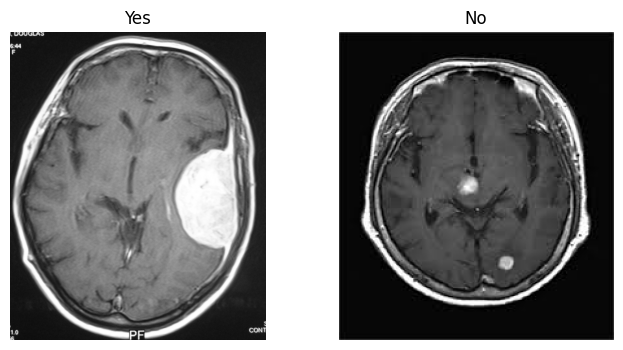

In [ ]:
plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 1)
plt.imshow(yes_image)
plt.title('Yes')
plt.axis('off')
plt.subplot(1, 2, 2)
plt.imshow(no_image)
plt.title('No')
plt.axis('off')
plt.show()

In [ ]:
#LOAD all images into arrays
def load_images(folder_path, label, img_size=(150, 150)):
  data=[]
  for filename in os.listdir(folder_path):
    img_path = os.path.join(folder_path, filename)
    try:
      img = Image.open(img_path).resize(img_size)
      img = np.array(img)
      if(img.shape==(150, 150, 3)):
        data.append([img, label])
    except:
      continue
  return data

In [ ]:
yes_data = load_images(yes_path, 1)
no_data = load_images(no_path, 0)

In [ ]:
#combine and shuffle data
all_data = yes_data + no_data
np.random.shuffle(all_data)

In [ ]:
X = np.array([item[0] for item in all_data])
y = np.array([item[1] for item in all_data])

In [ ]:
#Train test split
X = X / 255.0 #Normalize #max grayscale intensity 255
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [ ]:
#define CNN
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)), #for identifying the edges

    MaxPool2D(2, 2),#downsampling

    Conv2D(64, (3, 3), activation='relu'),

    MaxPool2D(2, 2),

    Flatten(), #2d->1d array

    Dense(128, activation='relu'), #FC network

    Dropout(0.5),

    Dense(1, activation='sigmoid') #binary
 ])

In [ ]:
model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)               │ (None, 148, 148, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 74, 74, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 72, 72, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 36, 36, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 82944)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │    10,616,960 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 10,636,481 (40.57 MB)

 Trainable params: 10,636,481 (40.57 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
#train model
history = model.fit(X_train, y_train, batch_size=32, epochs=10, validation_data=(X_test, y_test))

Epoch 1/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 11s 1s/step - accuracy: 0.5431 - loss: 1.0430 - val_accuracy: 0.7045 - val_loss: 0.6059
Epoch 2/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 7s 1s/step - accuracy: 0.7111 - loss: 0.5840 - val_accuracy: 0.7500 - val_loss: 0.5290
Epoch 3/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 11s 1s/step - accuracy: 0.8334 - loss: 0.4644 - val_accuracy: 0.7045 - val_loss: 0.5634
Epoch 4/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 6s 1s/step - accuracy: 0.8408 - loss: 0.4448 - val_accuracy: 0.7955 - val_loss: 0.4723
Epoch 5/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 10s 1s/step - accuracy: 0.8292 - loss: 0.3918 - val_accuracy: 0.7727 - val_loss: 0.4747
Epoch 6/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 10s 1s/step - accuracy: 0.9034 - loss: 0.2899 - val_accuracy: 0.7727 - val_loss: 0.4507
Epoch 7/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 11s 1s/step - accuracy: 0.9284 - loss: 0.2048 - val_accuracy: 0.8182 - val_loss: 0.4654
Epoch 8/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 11s 1s/step - accuracy: 0.9312 - loss: 0.1583 - val_accuracy: 0.7500 - val_loss: 0.6185
Epoch 9/10

In [ ]:
#evaluate
y_pred_prob = model.predict(X_test)
y_pred = (y_pred_prob > 0.5).astype(int).reshape(-1)

2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 252ms/step


In [ ]:
#classification report
print("Classification",classification_report(y_test, y_pred))

Classification               precision    recall  f1-score   support

           0       0.68      0.81      0.74        16
           1       0.88      0.79      0.83        28

    accuracy                           0.80        44
   macro avg       0.78      0.80      0.79        44
weighted avg       0.81      0.80      0.80        44



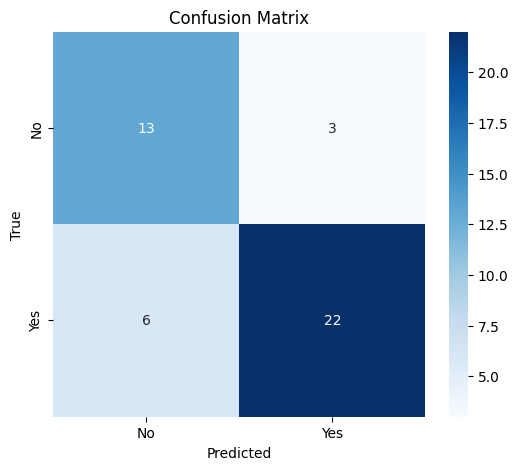

In [ ]:
#confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

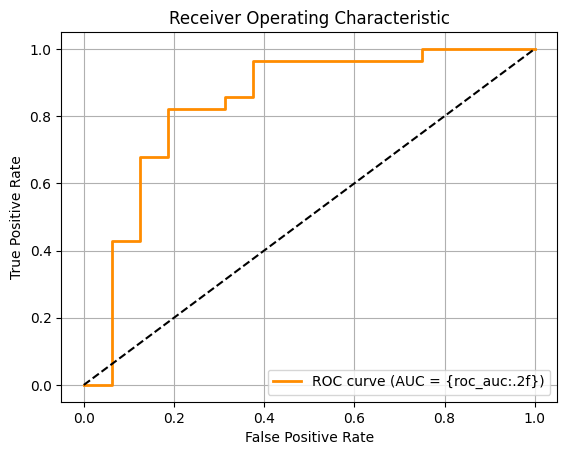

In [ ]:
fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend()
plt.grid(True)
plt.show()
